# Dinamika linijske konstrukcije z metodo končnih elementov

In [2]:
import sympy as sym
import numpy as np
import scipy as sp
import math
from scipy import linalg, spatial, integrate
%matplotlib inline
import matplotlib.pyplot as plt

## Analitična izpeljava - 2D

### Palica

In [3]:
x,L,A,ρ,E,I,α = sym.symbols('x,L,A,ρ,E,I,α')

# vektor monomov
monomi = sym.lambdify(x, sym.Matrix([[1,x]]), 'sympy')
monomi(x)

Matrix([[1, x]])

In [4]:
# vektor oblikovnih funkcij
_Ne =  monomi(x) @ sym.Matrix([monomi(0),monomi(L)])**-1
_Ne

Matrix([[1 - x/L, x/L]])

In [5]:
# matrika materialnih lastnosti
D = sym.Matrix([[E,0,0],
                [0,0,0],
                [0,0,0]])

D

Matrix([
[E, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [6]:
# matrika oblikovnih funkcij
Ne = sym.Matrix([[_Ne[0],0,0,_Ne[1],0,0],
                 [0,0,0,0,0,0],
                 [0,0,0,0,0,0]])
Ne

Matrix([
[1 - x/L, 0, 0, x/L, 0, 0],
[      0, 0, 0,   0, 0, 0],
[      0, 0, 0,   0, 0, 0]])

In [7]:
# odvodi oblikovnih funkcij
Be = sym.diff(Ne,x,1)
Be

Matrix([
[-1/L, 0, 0, 1/L, 0, 0],
[   0, 0, 0,   0, 0, 0],
[   0, 0, 0,   0, 0, 0]])

In [8]:
# masna matrika
Me_p = sym.integrate(A*ρ* Ne.T @ Ne,(x,0,L))
Me_p

Matrix([
[A*L*ρ/3, 0, 0, A*L*ρ/6, 0, 0],
[      0, 0, 0,       0, 0, 0],
[      0, 0, 0,       0, 0, 0],
[A*L*ρ/6, 0, 0, A*L*ρ/3, 0, 0],
[      0, 0, 0,       0, 0, 0],
[      0, 0, 0,       0, 0, 0]])

In [9]:
# togostna matrika
Ke_p = sym.integrate(A* Be.T @ D @ Be,(x,0,L))
Ke_p

Matrix([
[ A*E/L, 0, 0, -A*E/L, 0, 0],
[     0, 0, 0,      0, 0, 0],
[     0, 0, 0,      0, 0, 0],
[-A*E/L, 0, 0,  A*E/L, 0, 0],
[     0, 0, 0,      0, 0, 0],
[     0, 0, 0,      0, 0, 0]])

### Nosilci

In [10]:
# vektor monomov
monomi = sym.lambdify(x, sym.Matrix([[1,x,x**2,x**3]]), 'sympy')
monomi(x)

Matrix([[1, x, x**2, x**3]])

In [11]:
d_monomi = sym.lambdify(x, sym.diff(monomi(x), x), 'sympy')
d_monomi(x)

Matrix([[0, 1, 2*x, 3*x**2]])

In [12]:
# vektor oblikovnih funkcij
Ne_ = monomi(x) @ sym.Matrix([monomi(0), d_monomi(0), monomi(L), d_monomi(L)])**-1
Ne_

Matrix([[1 - 3*x**2/L**2 + 2*x**3/L**3, x - 2*x**2/L + x**3/L**2, 3*x**2/L**2 - 2*x**3/L**3, -x**2/L + x**3/L**2]])

In [13]:
# matrika oblikovnih funkcij
Ne = sym.Matrix([[0,Ne_[0],Ne_[1],0,Ne_[2],Ne_[3]]])

Ne = sym.lambdify(x, Ne, 'sympy')
Ne(x)

Matrix([[0, 1 - 3*x**2/L**2 + 2*x**3/L**3, x - 2*x**2/L + x**3/L**2, 0, 3*x**2/L**2 - 2*x**3/L**3, -x**2/L + x**3/L**2]])

In [14]:
# drugi odvodi oblikovnih funkcij
Be = sym.lambdify(x, sym.diff(Ne(x), x, x), 'sympy')
Be(x)

Matrix([[0, (-6 + 12*x/L)/L**2, (-4 + 6*x/L)/L, 0, (6 - 12*x/L)/L**2, (-2 + 6*x/L)/L]])

In [15]:
# masna matrika
Me_n = sym.integrate(A*ρ* Ne(x).T @ Ne(x),(x,0,L))
Me_n

Matrix([
[0,                0,               0, 0,                0,                0],
[0,      13*A*L*ρ/35, 11*A*L**2*ρ/210, 0,       9*A*L*ρ/70, -13*A*L**2*ρ/420],
[0,  11*A*L**2*ρ/210,    A*L**3*ρ/105, 0,  13*A*L**2*ρ/420,    -A*L**3*ρ/140],
[0,                0,               0, 0,                0,                0],
[0,       9*A*L*ρ/70, 13*A*L**2*ρ/420, 0,      13*A*L*ρ/35, -11*A*L**2*ρ/210],
[0, -13*A*L**2*ρ/420,   -A*L**3*ρ/140, 0, -11*A*L**2*ρ/210,     A*L**3*ρ/105]])

In [16]:
# togostna matrika
Ke_n = sym.integrate(E*I* Be(x).T @ Be(x),(x,0,L))
Ke_n

Matrix([
[0,            0,           0, 0,            0,           0],
[0,  12*E*I/L**3,  6*E*I/L**2, 0, -12*E*I/L**3,  6*E*I/L**2],
[0,   6*E*I/L**2,     4*E*I/L, 0,  -6*E*I/L**2,     2*E*I/L],
[0,            0,           0, 0,            0,           0],
[0, -12*E*I/L**3, -6*E*I/L**2, 0,  12*E*I/L**3, -6*E*I/L**2],
[0,   6*E*I/L**2,     2*E*I/L, 0,  -6*E*I/L**2,     4*E*I/L]])

### Enačba okvirja

In [17]:
Me = Me_p + Me_n
Me

Matrix([
[A*L*ρ/3,                0,               0, A*L*ρ/6,                0,                0],
[      0,      13*A*L*ρ/35, 11*A*L**2*ρ/210,       0,       9*A*L*ρ/70, -13*A*L**2*ρ/420],
[      0,  11*A*L**2*ρ/210,    A*L**3*ρ/105,       0,  13*A*L**2*ρ/420,    -A*L**3*ρ/140],
[A*L*ρ/6,                0,               0, A*L*ρ/3,                0,                0],
[      0,       9*A*L*ρ/70, 13*A*L**2*ρ/420,       0,      13*A*L*ρ/35, -11*A*L**2*ρ/210],
[      0, -13*A*L**2*ρ/420,   -A*L**3*ρ/140,       0, -11*A*L**2*ρ/210,     A*L**3*ρ/105]])

In [18]:
Ke = Ke_p + Ke_n
Ke

Matrix([
[ A*E/L,            0,           0, -A*E/L,            0,           0],
[     0,  12*E*I/L**3,  6*E*I/L**2,      0, -12*E*I/L**3,  6*E*I/L**2],
[     0,   6*E*I/L**2,     4*E*I/L,      0,  -6*E*I/L**2,     2*E*I/L],
[-A*E/L,            0,           0,  A*E/L,            0,           0],
[     0, -12*E*I/L**3, -6*E*I/L**2,      0,  12*E*I/L**3, -6*E*I/L**2],
[     0,   6*E*I/L**2,     2*E*I/L,      0,  -6*E*I/L**2,     4*E*I/L]])

In [19]:
# transformacijska matrika
T = sym.Matrix([[ sym.cos(α), sym.sin(α),           0,          0,          0, 0],
                [-sym.sin(α), sym.cos(α),           0,          0,          0, 0],
                [          0,          0,           1,          0,          0, 0],
                [          0,          0,           0, sym.cos(α), sym.sin(α), 0],
                [          0,          0,           0,-sym.sin(α), sym.cos(α), 0],
                [          0,          0,           0,          0,          0, 1]])
T

Matrix([
[ cos(α), sin(α), 0,       0,      0, 0],
[-sin(α), cos(α), 0,       0,      0, 0],
[      0,      0, 1,       0,      0, 0],
[      0,      0, 0,  cos(α), sin(α), 0],
[      0,      0, 0, -sin(α), cos(α), 0],
[      0,      0, 0,       0,      0, 1]])

## Priprava linijskega modela

### Podatki

In [20]:
a=1320.
b=550.
c=2050
d=500
e=(c-a)/2
E = 200000 # MPa
ρ = 7.85e-9 # kg/mm^3
A1 = 586 # mm^2
I1=36.08e4
A2=374
I2=24.2e4
A3=127
I3=2.93e4

In [21]:
# transformacijska matrika
def T(α):
    
    T = np.array([[ np.cos(α), np.sin(α), 0,         0,         0, 0],
                   [-np.sin(α), np.cos(α), 0,         0,         0, 0],
                   [         0,         0, 1,         0,         0, 0],
                   [         0,         0, 0, np.cos(α), np.sin(α), 0],
                   [         0,         0, 0,-np.sin(α), np.cos(α), 0],
                   [         0,         0, 0,         0,         0, 1]])
        
    return T

In [22]:
# masna matrika
def M_e(A, L, ρ, α):

    M_lok = ρ*A*L*np.array([[1/3,         0,         0, 1/6,         0,         0],
                            [  0,     13/35,  11*L/210,   0,      9/70, -13*L/420],
                            [  0,  11*L/210,  L**2/105,   0,  13*L/420, -L**2/140],
                            [1/6,         0,         0, 1/3,         0,         0],
                            [  0,      9/70,  13*L/420,   0,     13/35, -11*L/210],
                            [  0, -13*L/420, -L**2/140,   0, -11*L/210,  L**2/105]])
    
    return T(α).T @ M_lok @ T(α)

In [23]:
# togostna matrika
def K_e(A, E, I, L, α):

    K_lok = E/L*np.array([[ A,          0,      0, -A,          0,      0],
                          [ 0,  12*I/L**2,  6*I/L,  0, -12*I/L**2,  6*I/L],
                          [ 0,      6*I/L,    4*I,  0,     -6*I/L,    2*I],
                          [-A,          0,      0,  A,          0,      0],
                          [ 0, -12*I/L**2, -6*I/L,  0,  12*I/L**2, -6*I/L],
                          [ 0,      6*I/L,    2*I,  0,     -6*I/L,    4*I]])
    
    return T(α).T @ K_lok @ T(α)

### Geometrija

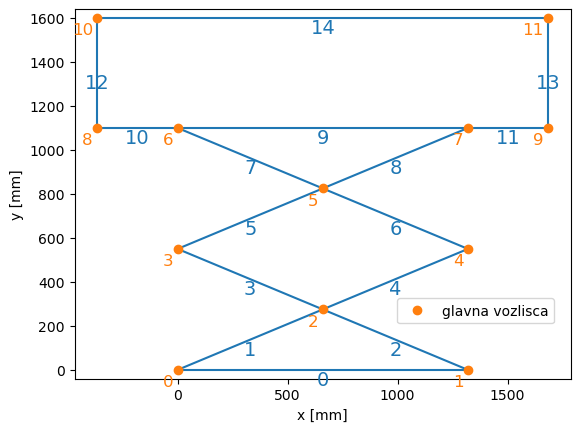

In [24]:
glavna_vozlisca=np.array([[0,0],[a,0],[a/2,b/2],[0,b],[a,b],[a/2,3*b/2],[0,2*b],[a,2*b],[-e,2*b],[a+e,2*b],[-e,2*b+d],[a+e,2*b+d]])
povezave=np.array([[0,1],[0,2],[1,2],[2,3],[2,4],[3,5],[4,5],[5,6],[5,7],[6,7],[8,6],[7,9],[8,10],[9,11],[10,11]])

tezisca = np.empty((0,2))
for i in range(len(povezave)):
    tezisca=np.append(tezisca,np.array([[np.sum(glavna_vozlisca[povezave[i],0])/2, np.sum(glavna_vozlisca[povezave[i], 1])/2]]),axis=0)
    

[plt.plot(glavna_vozlisca[[i,j],0],glavna_vozlisca[[i,j],1],'-',c='C0') for i,j in povezave]
plt.plot(glavna_vozlisca[:,0],glavna_vozlisca[:,1],'o',c='C1',label='glavna vozlisca');
plt.axis('equal');
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.legend(loc=(0.65,0.15))
[plt.annotate(j, (tezisca[j,0], tezisca[j,1]), color='C0', ha='center', va='top', size=14) for j in range(len(povezave))];
[plt.annotate(str(i),glavna_vozlisca[i]-20,c='C1', ha='right', va='top',size=12) for i in range(len(glavna_vozlisca))];

### Diskretizacija

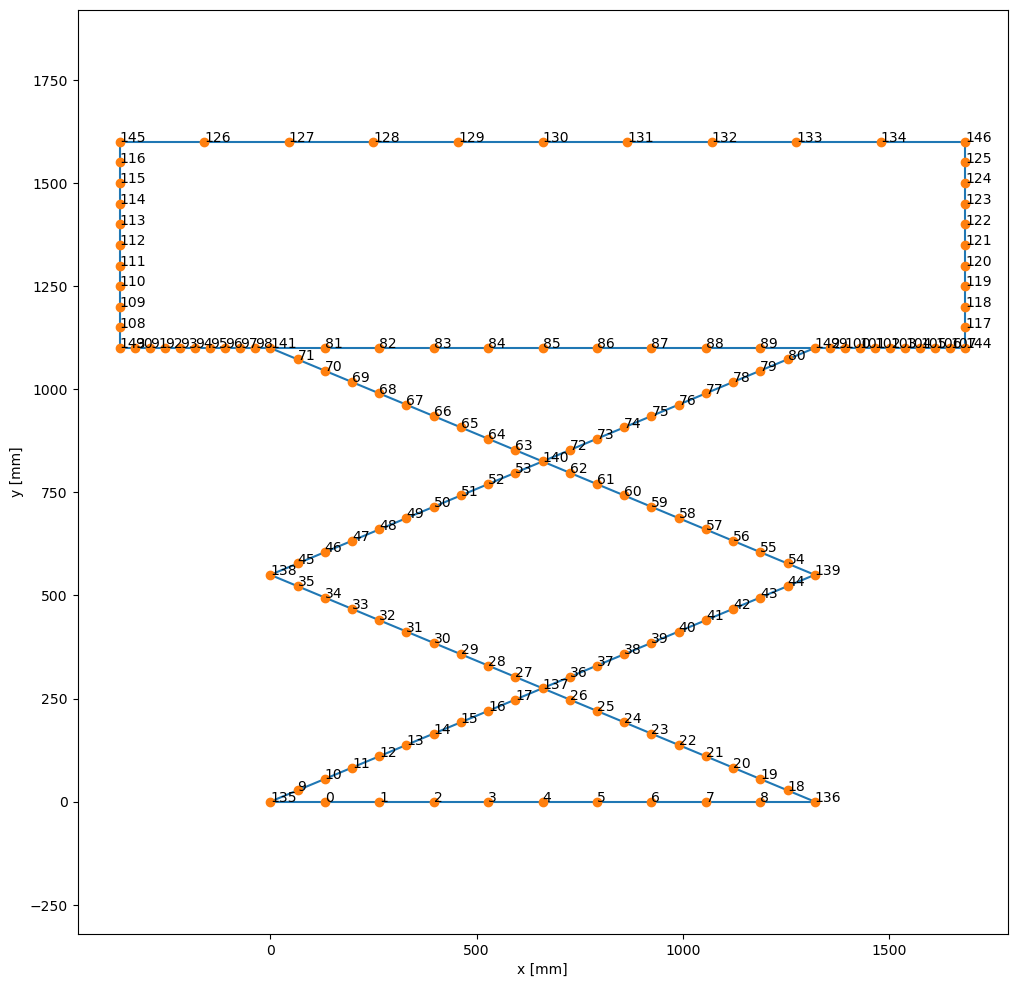

In [25]:
n_e = 10 #stevilo elementov na povezavo
vozlisca = np.empty((0,2))
elementi = np.empty((0,2),dtype=int)
for i in range(len(povezave)): #vmesne tocke
    x_coor = np.linspace(glavna_vozlisca[povezave[i]][0,0],glavna_vozlisca[povezave[i]][1,0],n_e+1) #x-koordinate posameznega nosilca
    y_coor = np.linspace(glavna_vozlisca[povezave[i]][0,1],glavna_vozlisca[povezave[i]][1,1],n_e+1) #y-koordinate posameznega nosilca
    coor_voz = np.array([x_coor[1:-1],y_coor[1:-1]]).T #brez prve in zadnje točke (samo vmesne)
    vozlisca = np.append(vozlisca,coor_voz,axis=0)
    el = np.array([[j+(i*(n_e-1)),j+1+(i*(n_e-1))] for j in range(0,n_e-2)]) #dolocimo elemente posameznega nosilca
    elementi = np.append(elementi,el,axis=0) #dodamo v skupni array
len_vmesnih = len(vozlisca) #shranimo stevilo vmesnih vozlisc
vozlisca = np.append(vozlisca,glavna_vozlisca,axis=0) #dodamo geometrijske tocke

for i in range(len(glavna_vozlisca)): #iteriramo po vseh geometrijskih tockah
    for j in range(len(np.where(povezave==i)[:][1])): #stevilo povezav iz ene geometrijske tocke
        if np.where(povezave==i)[:][1][j]==0: #geometrijska tocka se stika z zacetkom nosilca
            where=np.where(povezave==i)[:][0][j] #indeks nosilca, ki se ga geo. tocka dotika
            elementi=np.append(elementi,np.array([[i+len_vmesnih,where*(n_e-1)]]),axis=0) #dodamo element v array
        else: #geometrijska tocka se stika s koncem nosilca
            where=np.where(povezave==i)[:][0][j] #indeks nosilca, ki se ga geo. tocka dotika
            elementi=np.append(elementi,np.array([[i+len_vmesnih,where*(n_e-1)+(n_e-2)]]),axis=0) #dodamo element v array 
plt.figure(figsize=(12,12))
[plt.plot(vozlisca[[i,j],0],vozlisca[[i,j],1],'-',c='C0') for i,j in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],'o',c='C1');
plt.axis('equal');
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
[plt.annotate(str(i),vozlisca[i]) for i in range(len(vozlisca))];


In [26]:
# sestav globalne masne in togostne matrike
M_glob = np.zeros((vozlisca.shape[0]*3,vozlisca.shape[0]*3))
K_glob = np.zeros((vozlisca.shape[0]*3,vozlisca.shape[0]*3))

for ele in elementi:
    # dolžina elementa
    Le = spatial.distance.euclidean(vozlisca[ele[0]], vozlisca[ele[1]])
    
    # kot zasuka
    αe = np.arctan2(np.diff(vozlisca[ele,1]) , np.diff(vozlisca[ele,0]))[0]
    
    # indeksi prostostnih stopenj
    ind_ = np.array([3*ele[0],3*ele[0]+1,3*ele[0]+2,3*ele[1],3*ele[1]+1,3*ele[1]+2])
    ind = [[i] for i in ind_]

    
    if ele[1] >= 9*(n_e-1) and ele[1] < 12*(n_e-1): #A2 I2
        M_glob[ind_,ind] += M_e(A2, Le, ρ, αe)
        K_glob[ind_,ind] += K_e(A2, E, I2, Le, αe)
    
    elif ele[1] >=  12*(n_e-1) and ele[1]<15*(n_e-1): #A3 I3
        M_glob[ind_,ind] += M_e(A3, Le, ρ, αe)
        K_glob[ind_,ind] += K_e(A3, E, I3, Le, αe)
    
    else: #A1 I1
        M_glob[ind_,ind] += M_e(A1, Le, ρ, αe)
        K_glob[ind_,ind] += K_e(A1, E, I1, Le, αe)

In [27]:
ind_ps = np.arange(3*len(vozlisca))
vpete_ps = ind_ps[[len_vmesnih*3+1, len_vmesnih*3+3, len_vmesnih*3+4]];
proste_ps = np.setdiff1d(ind_ps, vpete_ps)
ind = [[i] for i in proste_ps]

In [28]:
M_glob_ = M_glob[proste_ps, ind]
K_glob_ = K_glob[proste_ps, ind]

## Modalna analiza

### Lastne vrednosti in lastni vektorji

In [29]:
# lastne vrednosti in lastni vektorji
eig_val, eig_vec = sp.linalg.eig(K_glob_, M_glob_)

# urejanje po velikosti
_ind = np.argsort(np.abs(eig_val))
eig_val = eig_val[_ind]
eig_vec = eig_vec[:,_ind]

#frekvence v Hz
eig_freq = np.abs(eig_val)**0.5 / 2 / np.pi

### Lastne frekvence

In [30]:
eig_freq.round(3)[:6] #Hz

array([ 18.906,  45.606,  61.415,  62.568,  72.624, 161.989])

### Lastne oblike

In [31]:
m = 0 #izbrani nihajni način
skal = 150

eig_vec_razsirjen = np.zeros(3*len(vozlisca))
eig_vec_razsirjen[proste_ps] += eig_vec[:, m]

eig_vec_razsirjen /= np.max(np.abs(eig_vec_razsirjen)) # normiramo vrednosti na 1
eig_vec_razsirjen *=skal

pomiki_x = eig_vec_razsirjen[0::3]
pomiki_y = eig_vec_razsirjen[1::3]

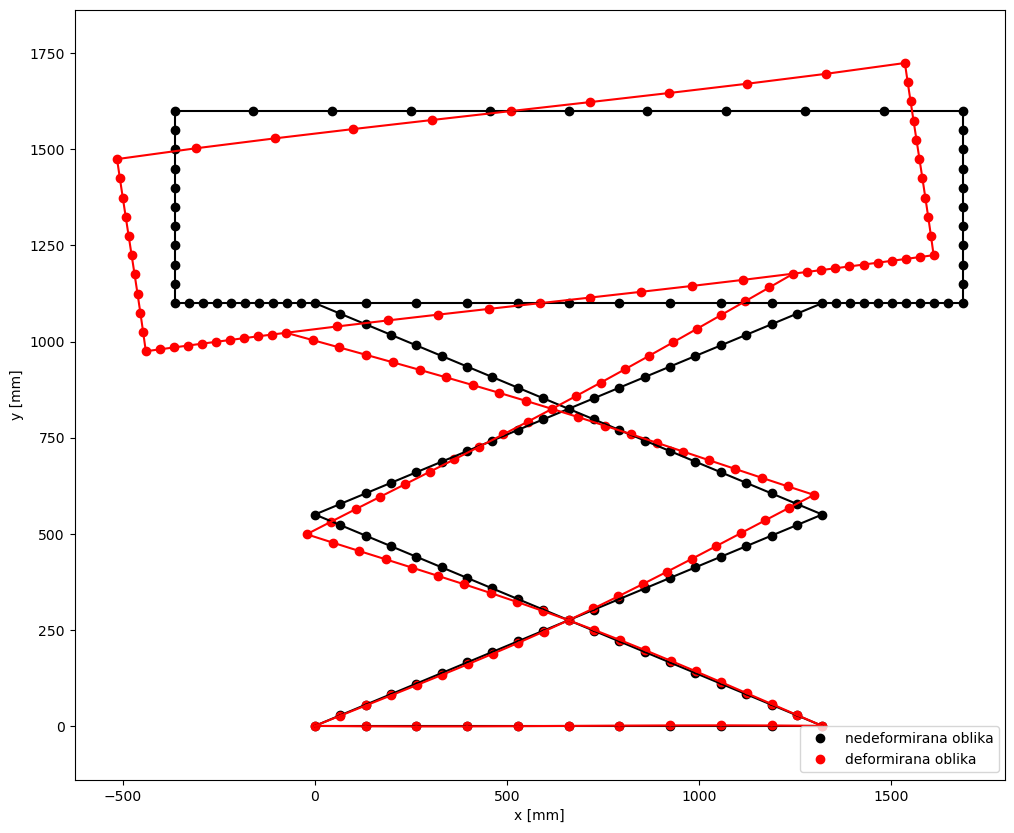

In [32]:
def_vozlisca = np.copy(vozlisca)

def_vozlisca[:, 0] += pomiki_x
def_vozlisca[:, 1] += pomiki_y

plt.figure(figsize=(12,10))

plt.plot(vozlisca[:,0],vozlisca[:,1],'ok',label='nedeformirana oblika')
plt.plot(def_vozlisca[:,0], def_vozlisca[:, 1], 'ro',label='deformirana oblika')
plt.legend(loc=(0.78,0.01),)
plt.axis('equal')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
[plt.plot(vozlisca[[i,j],0], vozlisca[[i,j],1], 'k') for i,j in elementi ]
[plt.plot(def_vozlisca[[i,j],0], def_vozlisca[[i,j],1], 'r') for i,j in elementi ]
plt.show()
#plt.savefig('6_lastna_oblika.png',dpi=300)

### Animacija lastne oblike

In [33]:
%matplotlib qt
import matplotlib.animation as animation

amp = np.linspace(-1,1,25)
amp = np.block([amp,amp[::-1]])
amp = np.tile(amp,20)

m = 2; #izbrani nihajni način (mode)
scal = 150

fig,ax = plt.subplots()
ax.set_xlim(-600,2000)
ax.set_ylim(-50,2000)

line, = ax.plot([], [], lw=2)
def animate(i):
    
    eig_vec_razsirjen = np.zeros(3*len(vozlisca))
    eig_vec_razsirjen[proste_ps] += eig_vec[:,m]

    eig_vec_razsirjen /= np.max(np.abs(eig_vec_razsirjen))
    eig_vec_razsirjen *= scal*amp[i]

    pomiki_x = eig_vec_razsirjen[0::3]
    pomiki_y = eig_vec_razsirjen[1::3]

    vozlisca_def = np.copy(vozlisca)
    vozlisca_def[:,0] += pomiki_x
    vozlisca_def[:,1] += pomiki_y
    
    line.set_data(vozlisca_def[:,0],vozlisca_def[:,1])
    line.set_marker('.')
    line.set_linestyle('None')
    return (line,)

def init():
    line.set_data([], [])
    return (line,)

ani = animation.FuncAnimation(
    fig, animate,  init_func=init, frames=100, interval=10, blit=True)

plt.show()

In [34]:
#ani.save('3_lastna_oblika.gif', writer='imagemagick', fps=60,dpi=300)

## Harmonska analiza

In [35]:
%matplotlib inline

### Določitev vzbujanja

In [36]:
#amplituda vzbujevalnih sil
FCx = 586
FCy = 247

f_glob = np.zeros(3*len(vozlisca)) # pazimo na robne pogoje

ind_voz=len_vmesnih+5 #tocka vzbujanja
ind_x, ind_y, ind_phi = 3*ind_voz+np.array([0,1,2]) #prostostne stopnje vzbujanja
f_glob[ind_x] = FCx
f_glob[ind_y] = FCy

f_glob = f_glob[proste_ps] #odstranimo vpete - robni pogoji

### Prehod v modalno domeno

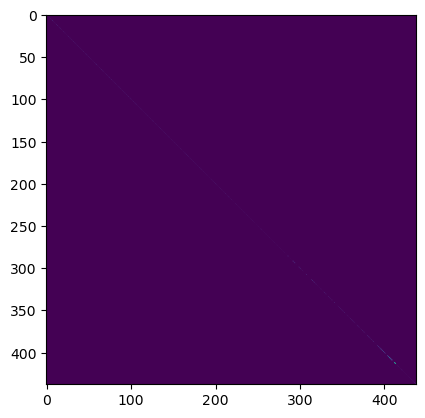

In [37]:
plt.imshow(eig_vec.T @ M_glob_ @ eig_vec);

In [38]:
m_mod = np.diagonal(eig_vec.T @ M_glob_ @ eig_vec) #modalne mase
Φ = eig_vec / m_mod**0.5

(Φ.T @ M_glob_ @ Φ).round(1)

array([[ 1.,  0.,  0., ..., -0., -0., -0.],
       [ 0.,  1., -0., ..., -0.,  0., -0.],
       [ 0., -0.,  1., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ...,  1., -0.,  0.],
       [-0.,  0., -0., ..., -0.,  1.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  1.]])

In [39]:
M_m = Φ.T @ M_glob_ @ Φ
K_m = Φ.T @ K_glob_ @ Φ
h_m = Φ.T @ f_glob

In [40]:
M=len(eig_val)

In [41]:
δ = 0.003
ω = np.arange(2000)

H_mod = np.zeros([M,ω.shape[0]],dtype=complex)
phi_i = np.zeros([M,ω.shape[0]])

for i in range(M):
    ω_i = eig_val[i].real**0.5    
    H_mod[i] = h_m[i]/M_m[i,i]/(-ω**2+ω_i**2+2.j*δ*ω*ω_i)
    phi_i[i] = np.arctan2(2*δ*ω/ω_i, 1-(ω/ω_i)**2)
    
H_fiz = Φ @ H_mod

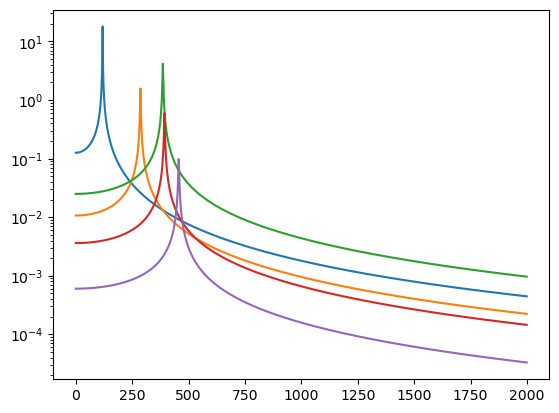

In [42]:
plt.semilogy(np.abs(H_mod[:5]).T);

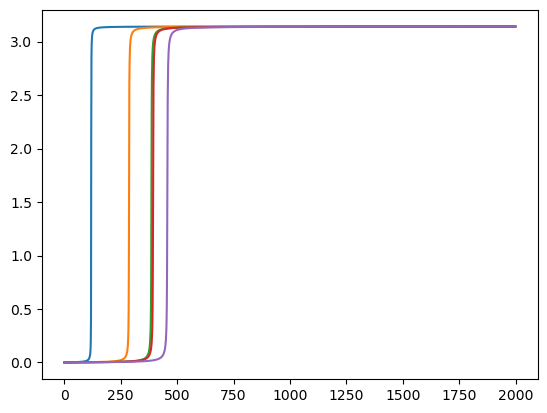

In [43]:
plt.plot(phi_i[:5].T);

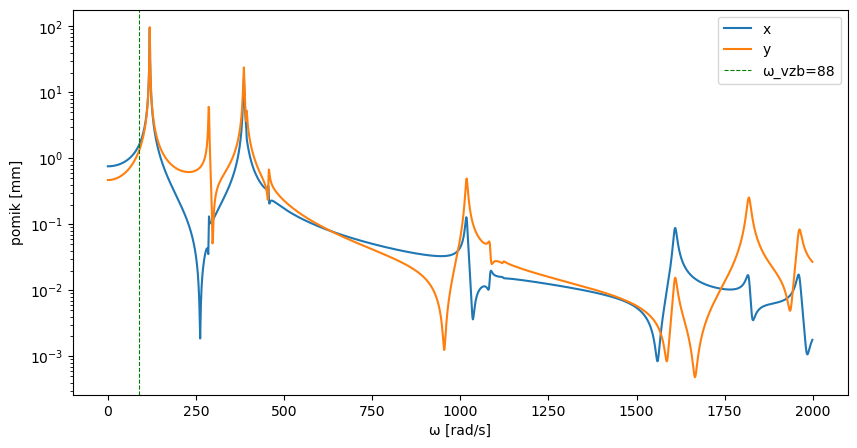

In [44]:
ind_vozlisca = len_vmesnih+7 #poiščemo lokacijo želenih ps v prostih ps
ind_x, ind_y, ind_phi = 3*ind_vozlisca + np.array([0,1,2])

ind_x = int(np.where(proste_ps == ind_x)[0])
ind_y = int(np.where(proste_ps == ind_y)[0])
ind_phi = int(np.where(proste_ps == ind_phi)[0])

plt.figure(figsize=(10,5));
plt.semilogy(np.abs(H_fiz[ind_x]),label='x')
plt.semilogy(np.abs(H_fiz[ind_y]),label='y')
plt.axvline(x=88,c='g',linestyle='dashed',linewidth=0.8,label='ω_vzb=88')
plt.xlabel('ω [rad/s]')
plt.ylabel('pomik [mm]')
plt.legend();
#plt.savefig('harmonski_odziv_ampl.png',dpi=300)

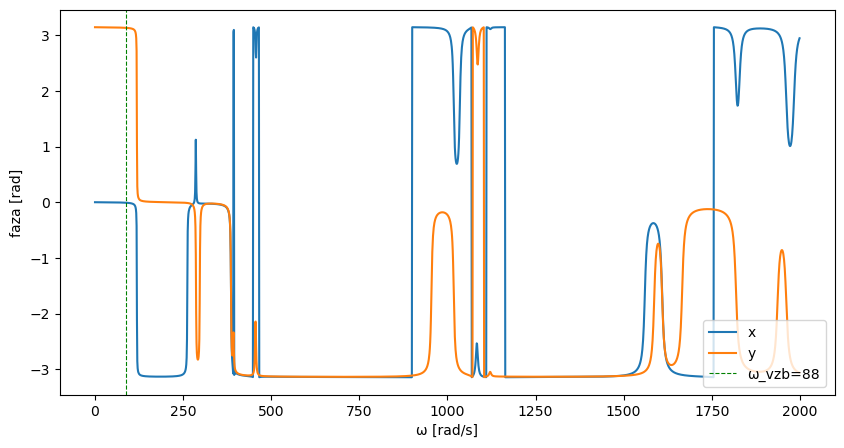

In [45]:
plt.figure(figsize=(10,5))
plt.plot(np.angle(H_fiz[ind_x]),label='x')
plt.plot(np.angle(H_fiz[ind_y]),label='y')
plt.axvline(x=88,c='g',linestyle='dashed',linewidth=0.8,label='ω_vzb=88')
plt.xlabel('ω [rad/s]')
plt.ylabel('faza [rad]')
plt.legend(loc=(0.83,0.02));
#plt.savefig('harmonski_odziv_faza.png',dpi=300)

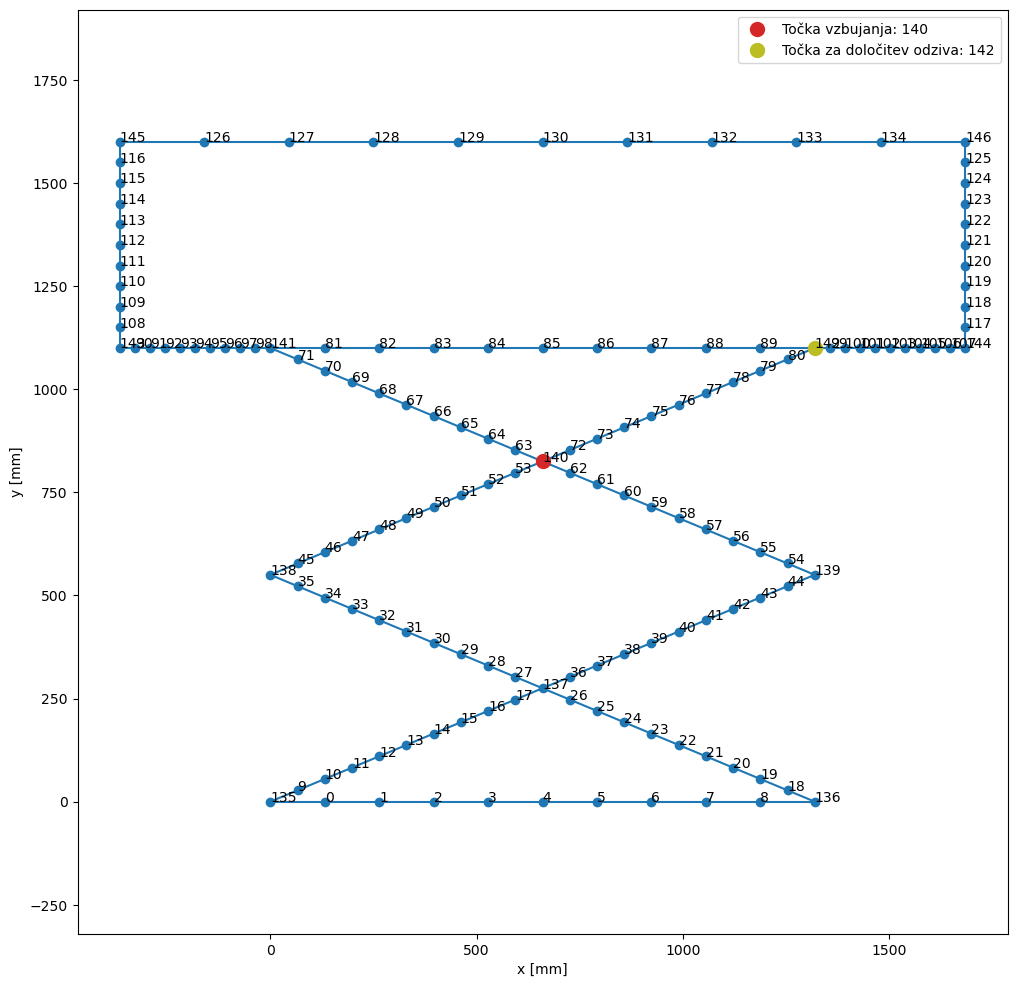

In [46]:
plt.figure(figsize=(12,12))
[plt.plot(vozlisca[[i,j],0],vozlisca[[i,j],1],'-',c='C0') for i,j in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],'o',c='C0')
plt.axis('equal')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
[plt.annotate(str(i),vozlisca[i]) for i in range(len(vozlisca))]
plt.plot(vozlisca[ind_voz,0],vozlisca[ind_voz,1],'o',c='C3',markersize = 10,label='Točka vzbujanja: '+str(ind_voz))
plt.plot(vozlisca[ind_vozlisca,0],vozlisca[ind_vozlisca,1],'o',c='C8',markersize = 10,label='Točka za določitev odziva: '+str(ind_vozlisca))
plt.legend()
#plt.savefig('harmonska_vozlisca.png',dpi=300)

Amplituda x: 1.573
Faza x: -0.009
Amplituda y: 1.283
Faza y: 3.13


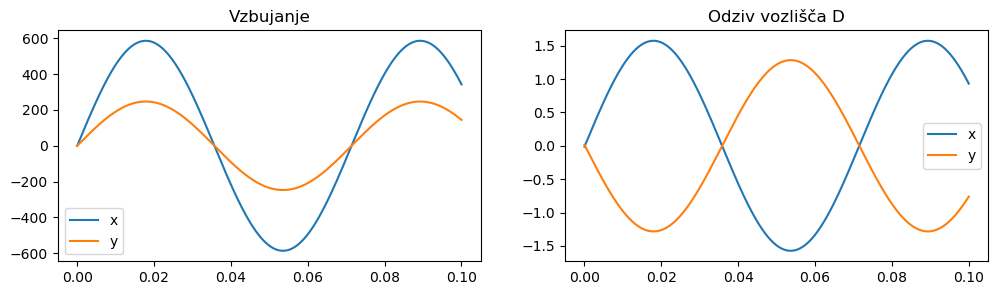

In [47]:
# odziv pri vzbujanju z eno frekvenco: časovni odziv
ω_vzb=88
amp_x = np.abs(H_fiz[ind_x, np.where(ω == ω_vzb)[0]])
faza_x = np.angle(H_fiz[ind_x, np.where(ω == ω_vzb)[0]])
amp_y = np.abs(H_fiz[ind_y, np.where(ω == ω_vzb)[0]])
faza_y = np.angle(H_fiz[ind_y, np.where(ω == ω_vzb)[0]])

print('Amplituda x:',amp_x[0].round(3))
print('Faza x:',faza_x[0].round(3))
print('Amplituda y:',amp_y[0].round(3))
print('Faza y:',faza_y[0].round(3))

t=np.linspace(0,0.1,1000)

plt.figure(figsize=(12,3))
plt.subplot(121)
plt.title('Vzbujanje')
plt.plot(t,FCx*np.sin(ω_vzb*t),label='x')
plt.plot(t,FCy*np.sin(ω_vzb*t),label='y')
plt.legend();

plt.subplot(122)
plt.title('Odziv vozlišča D')
plt.plot(t,amp_x*np.sin(ω_vzb*t+faza_x),label='x')
plt.plot(t,amp_y*np.sin(ω_vzb*t+faza_y),label='y')
plt.legend();
#plt.savefig('casovni_odziv.png',dpi=300)

## Časovna integracija

### Predpis vzbujanja

In [48]:
# trajanje impulza
t0 = 0.11 # s
# amplituda impulza
amp = 1865 # N

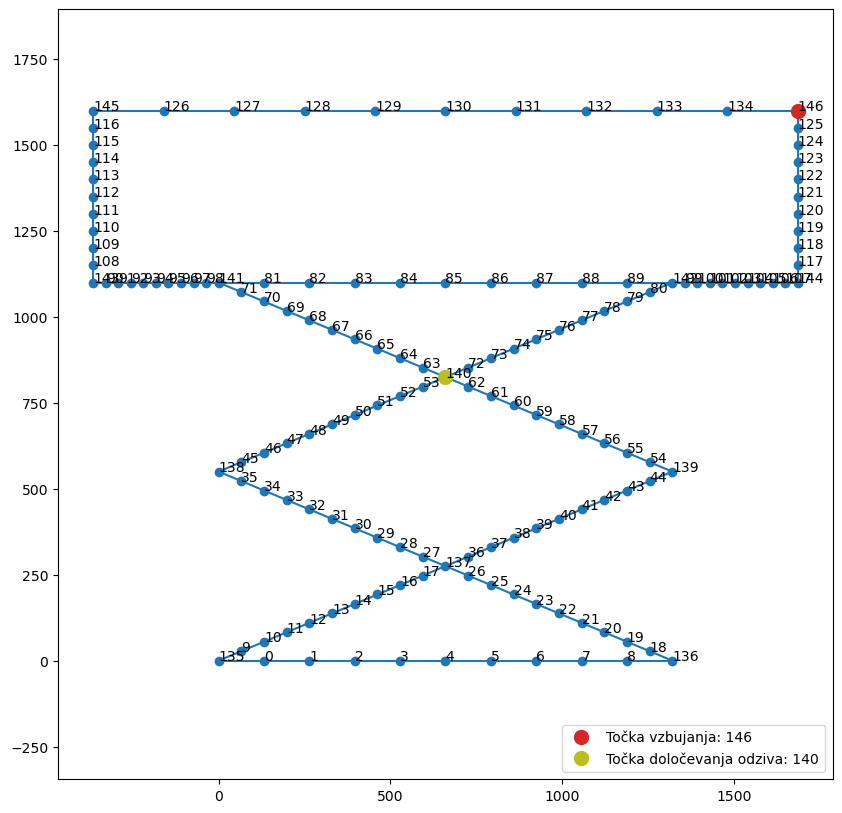

In [49]:
ind_vozlisca_E = len_vmesnih+11
ind_x_vzb, ind_y_vzb, ind_phi_vzb = 3*ind_vozlisca_E + np.array([0,1,2])

%matplotlib inline
plt.figure(figsize=(10,10))
[plt.plot(vozlisca[[i,j],0],vozlisca[[i,j],1],'-',c='C0') for i,j in elementi]
[plt.annotate(str(i),vozlisca[i]) for i in range(len(vozlisca))]
plt.plot(vozlisca[:,0],vozlisca[:,1],'o');
plt.plot(vozlisca[ind_vozlisca_E,0],vozlisca[ind_vozlisca_E,1],'o',c='C3',markersize = 10,label='Točka vzbujanja: '+str(ind_vozlisca_E));
plt.plot(vozlisca[ind_voz,0],vozlisca[ind_voz,1],'o',c='C8',markersize = 10,label='Točka določevanja odziva: '+str(ind_voz));
plt.axis('equal');
plt.ylim((-50,1600))
plt.legend(loc=(0.65,0.01));
#plt.savefig('cas_int_vozlisca.png',dpi=300)

In [50]:
# generacija vektorja obremenitev

def f_glob_(t):
    f_glob = np.zeros(3*len(vozlisca))
    
    if t < t0:
        f_B = amp*np.sin(np.pi*t/t0)
        
    else:
        f_B = 0
    
    f_glob[ind_x_vzb] =0
    f_glob[ind_y_vzb] = f_B
    
    return f_glob[proste_ps]

In [51]:
# proporcionalno dušenje
α = 5e-2
β = 3e-4
C_glob_ = α*M_glob_ + β*K_glob_

In [52]:
# prehod na sistem DE 1. reda
D = np.block([[-np.linalg.inv(M_glob_)@C_glob_,-np.linalg.inv(M_glob_)@K_glob_],
          [np.eye(M_glob_.shape[0]),np.zeros_like(M_glob_)]])

#integracijska funkcija
def int_fun(t,u): #t-skalar, u-vektor
    F = np.block([np.linalg.inv(M_glob_)@f_glob_(t),np.zeros_like(f_glob_(t))])
    return D @ u + F

In [53]:
# začetni pogoj
u0 = np.zeros(2*M_glob_.shape[0])

In [54]:
# reševanje s knjižnico scipy
t_min = 0
t_max = 5
t_e = np.linspace(t_min,t_max,500) #za lepšo animacijo naredimo ekvidistančne čase

res = sp.integrate.solve_ivp(int_fun, t_span=(t_min,t_max), y0=u0, method='Radau', t_eval=t_e)

q_dot, q = np.split(res.y,2) #razdelimo na hitrosti in pomike

q.shape #pomiki

(438, 500)

In [55]:
# izbrana lokacija odziva

ind_vozlisca_odz = ind_voz #definirana ze pri modalni analizi
ind_x_odz, ind_y_odz, ind_phi_odz = np.copy(3*ind_vozlisca_odz + np.array([0,1,2]))

ind_x_odz, ind_y_odz, ind_phi_odz = np.copy([int(np.where(_ == proste_ps)[0]) for _ in [ind_x_odz, ind_y_odz, ind_phi_odz]])

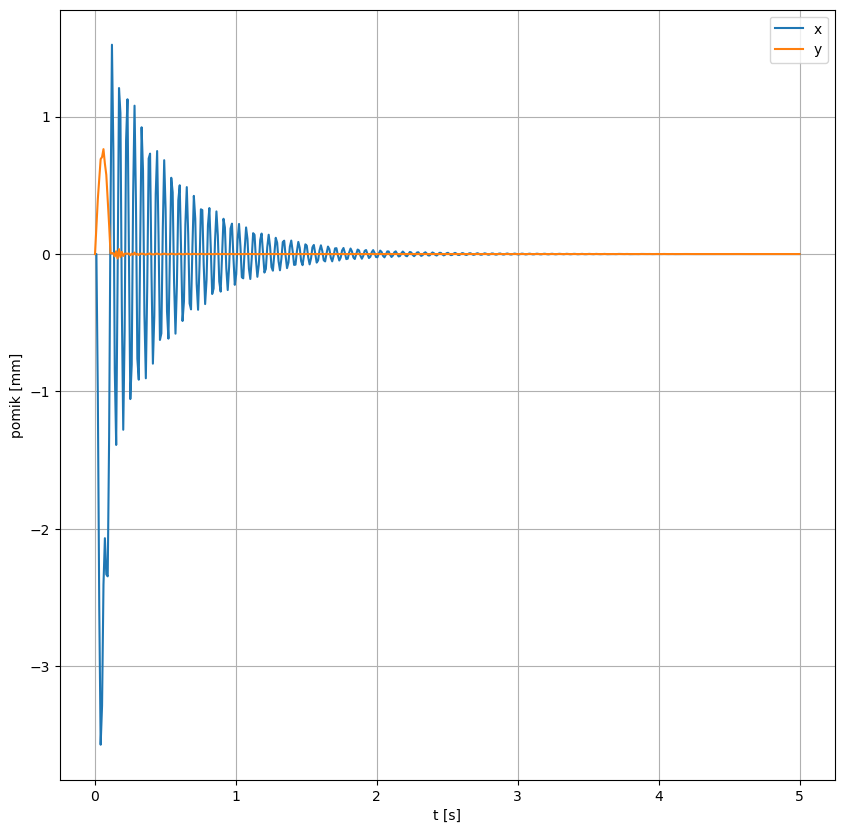

In [56]:
plt.figure(figsize=(10,10))
plt.plot(res.t, q[ind_x_odz],label='x')
plt.plot(res.t, q[ind_y_odz],label='y')
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('pomik [mm]')
plt.legend();
plt.savefig('odziv_cas_int.png', dpi=300)

In [57]:
# animacija gibanja
%matplotlib qt
import matplotlib.animation as animation

scale = 10
q_razsirjen = np.zeros([3*len(vozlisca),q.shape[1]])
q_razsirjen[proste_ps] = q

fig = plt.figure() 
ax = plt.axes(xlim =(-500,2000), 
                ylim =(-50,2500)) 

line, = ax.plot([], [],'o') 

def init(): 
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(vozlisca[:,0] + scale*q_razsirjen[0::3,i], 
                  vozlisca[:,1] + scale*q_razsirjen[1::3,i])
    return line,

ani2 = animation.FuncAnimation(fig, animate, init_func = init, interval = 100, blit = True)

plt.show()

In [58]:
#ani2.save('udarna_motnja.gif', writer='imagemagick', fps=30,dpi=300)